In [3]:
import cv2

In [5]:
cv2.imread("C:/Users/rcc/Pictures/Screenshots/S.png")

array([[[249, 164,   0],
        [249, 164,   0],
        [249, 164,   0],
        ...,
        [184,  66,   7],
        [182,  64,   5],
        [180,  62,   3]],

       [[249, 164,   0],
        [249, 164,   0],
        [249, 164,   0],
        ...,
        [177,  59,   0],
        [179,  61,   2],
        [182,  64,   5]],

       [[249, 164,   0],
        [249, 164,   0],
        [249, 164,   0],
        ...,
        [182,  64,   5],
        [182,  64,   5],
        [182,  64,   5]],

       ...,

       [[ 67,  58,  36],
        [ 65,  56,  34],
        [ 66,  57,  35],
        ...,
        [ 66,  40,  27],
        [ 65,  39,  26],
        [ 66,  40,  27]],

       [[ 67,  58,  36],
        [ 66,  57,  35],
        [ 67,  58,  36],
        ...,
        [ 65,  39,  26],
        [ 65,  39,  26],
        [ 64,  38,  25]],

       [[ 66,  57,  35],
        [ 66,  57,  35],
        [ 67,  58,  36],
        ...,
        [ 66,  40,  27],
        [ 68,  42,  29],
        [ 66,  40,  27]]

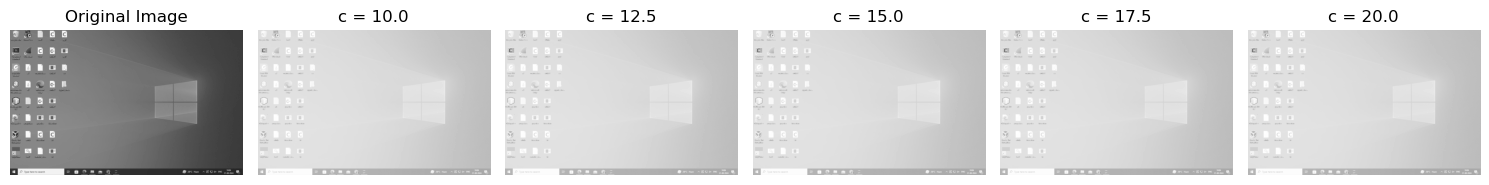

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_log_transformation(image, c):
    """
    Apply logarithmic transformation to the input image.
    
    Parameters:
        image (numpy array): The input grayscale image.
        c (float): The scaling factor for the logarithmic transformation.
    
    Returns:
        numpy array: The transformed image.
    """
    # Convert image to float for computation
    image = image.astype(float)
    
    # Apply logarithmic transformation
    transformed_image = c * np.log1p(image)
    
    # Normalize the result to [0, 255] and convert to uint8
    transformed_image = 255 * (transformed_image - np.min(transformed_image)) / (np.max(transformed_image) - np.min(transformed_image))
    return transformed_image.astype(np.uint8)

def show_images(original, transformed_images, c_values):
    """
    Display the original and transformed images.
    
    Parameters:
        original (numpy array): The original image.
        transformed_images (list of numpy arrays): The list of transformed images.
        c_values (list of floats): The scaling factors used for transformation.
    """
    plt.figure(figsize=(15, 5))
    
    # Display original image
    plt.subplot(1, len(c_values) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display transformed images
    for i, (c, img) in enumerate(zip(c_values, transformed_images)):
        plt.subplot(1, len(c_values) + 1, i + 2)
        plt.imshow(img, cmap='gray')
        plt.title(f'c = {c}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the image
image_path = 'C:/Users/rcc/Pictures/Screenshots/S.png'  # Replace with your image path
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
original_image = np.array(original_image)

# Define the range of c values
c_values = np.linspace(10, 20,5)  # 5 values between 10 and 20

# Apply logarithmic transformation for each c value
transformed_images = [apply_log_transformation(original_image, c) for c in c_values]

# Show the images
show_images(original_image, transformed_images, c_values)


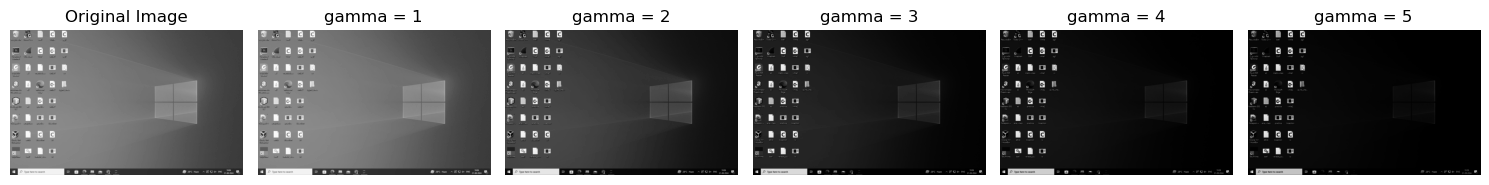

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_power_law_transformation(image, gamma, c=1.0):
    """
    Apply power-law (gamma) transformation to the input image.
    
    Parameters:
        image (numpy array): The input grayscale image.
        gamma (float): The gamma value for the transformation.
        c (float): The scaling factor for the transformation.
    
    Returns:
        numpy array: The transformed image.
    """
    # Convert image to float for computation
    image = image.astype(float)
    
    # Apply power-law transformation
    transformed_image = c * np.power(image / 255.0, gamma) * 255.0
    
    # Clip values to [0, 255] and convert to uint8
    transformed_image = np.clip(transformed_image, 0, 255)
    return transformed_image.astype(np.uint8)

def show_images(original, transformed_images, gamma_values):
    """
    Display the original and transformed images.
    
    Parameters:
        original (numpy array): The original image.
        transformed_images (list of numpy arrays): The list of transformed images.
        gamma_values (list of floats): The gamma values used for transformation.
    """
    plt.figure(figsize=(15, 5))
    
    # Display original image
    plt.subplot(1, len(gamma_values) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display transformed images
    for i, (gamma, img) in enumerate(zip(gamma_values, transformed_images)):
        plt.subplot(1, len(gamma_values) + 1, i + 2)
        plt.imshow(img, cmap='gray')
        plt.title(f'gamma = {gamma}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the image
image_path = 'C:/Users/rcc/Pictures/Screenshots/S.png'  # Replace with your image path
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
original_image = np.array(original_image)

# Define the range of gamma values
gamma_values = [1, 2, 3, 4, 5]  # Example gamma values

# Apply power-law transformation for each gamma value
transformed_images = [apply_power_law_transformation(original_image, gamma) for gamma in gamma_values]

# Show the images
show_images(original_image, transformed_images, gamma_values)


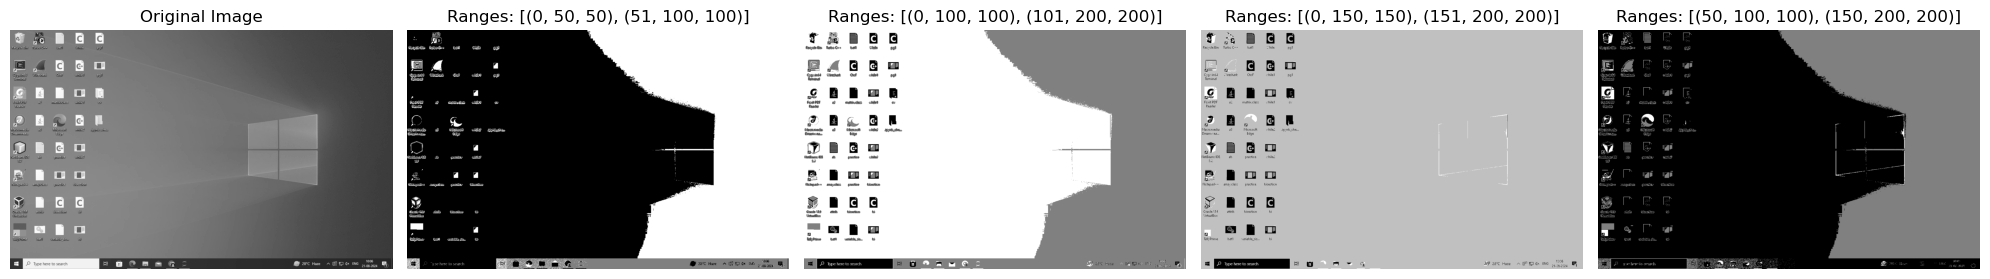

In [33]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def apply_intensity_slicing(image, ranges_values):
    """
    Apply intensity slicing to the input image with multiple ranges, each mapped to different values.
    
    Parameters:
        image (numpy array): The input grayscale image.
        ranges_values (list of tuples): List of (min, max, value) tuples defining intensity ranges and corresponding values.
    
    Returns:
        numpy array: The sliced image with mapped values.
    """
    # Convert image to float for computation
    image = image.astype(float)
    
    # Create an output image initialized with zeros
    sliced_image = np.zeros_like(image, dtype=np.uint8)
    
    # Apply intensity slicing
    for min_val, max_val, value in ranges_values:
        mask = (image >= min_val) & (image <= max_val)
        sliced_image[mask] = value
    
    return sliced_image

def show_images(original, images, titles):
    """
    Display the original and multiple sliced images.
    
    Parameters:
        original (numpy array): The original image.
        images (list of numpy arrays): The list of sliced images.
        titles (list of str): Titles for the sliced images.
    """
    plt.figure(figsize=(20, 10))
    
    # Display original image
    plt.subplot(1, len(images) + 1, 1)
    plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Display sliced images
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images) + 1, i + 2)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the image
image_path = 'C:/Users/rcc/Pictures/Screenshots/S.png'  # Replace with your image path
original_image = Image.open(image_path).convert('L')  # Convert to grayscale
original_image = np.array(original_image)

# Define different intensity ranges and values for different images
configs = [
    [(0, 50, 50), (51, 100, 100)],  # First configuration
    [(0, 100, 100), (101, 200, 200)],  # Second configuration
    [(0, 150, 150), (151, 200, 200)],  # Third configuration
    [(50, 100, 100), (150, 200, 200)]  # Fourth configuration
]

# Generate images for each configuration
sliced_images = [apply_intensity_slicing(original_image, config) for config in configs]
titles = [f'Ranges: {config}' for config in configs]

# Show the images
show_images(original_image, sliced_images, titles)
